In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
bonds = screen_funds('Bonds', 'Domestic', 'Government', min_assets=.8)
equities = screen_funds('Equities', 'Domestic', 'Large-Cap', min_assets=.8)
print(len(bonds), len(equities))
quote = Quote(bonds + equities, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

22 92
from 2019-05-23 to 2019-07-12 - 114


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

114


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
QQQ,30,1.376555,2.364098,0.565489,8.812278,4.561016
FTC,30,1.373258,1.909945,0.698227,8.604736,2.299020
MTUM,30,1.305846,1.935395,0.654215,8.165649,2.283105
ONEQ,30,1.303093,2.150144,0.587594,8.352280,3.979597
JKE,30,1.285463,2.018746,0.617106,8.339758,3.669170
VONG,30,1.269703,1.989077,0.618387,8.131671,3.334843
SCHG,30,1.269550,1.903774,0.646016,8.354148,3.365560
VUG,30,1.265819,2.008496,0.610475,8.209475,3.543155
IWF,30,1.264309,1.996596,0.613357,8.159185,3.422537


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:1960: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


evicted VMBS 0.897 -0.386
evicted VGSH 0.880 -0.413
evicted CET 0.864 -0.204
evicted TDTT 0.499 -0.263
evicted JKE 0.894 -0.471
evicted VLUE 0.889 -0.456
retry backlogs ['LRGF', 'SDY', 'QDF', 'DGRW', 'NOBL', 'PWV', 'SPHQ', 'QQQ', 'SUSA', 'JHML', 'VIG', 'FVD', 'VTI', 'TLH', 'VYM', 'SCHV', 'FEX', 'RSP', 'SCHD', 'SPTL', 'MBB', 'IEF', 'IEI', 'SCHR', 'VOOV', 'DGRO', 'VONE', 'VGLT', 'TLT', 'VOOG', 'SPTM', 'IVV', 'IWV', 'FTA', 'SPYD', 'SCHK', 'VGIT', 'FDL', 'MGC', 'SPYG', 'IUSG', 'IVW', 'MGV', 'IYY', 'IWY', 'VONG', 'MGK', 'MTUM', 'SPY', 'VOO', 'VV', 'ITOT', 'SCHG', 'QUAL', 'SCHB', 'SPLG', 'CFO', 'RPG', 'FNDX', 'DSI', 'SPYV', 'VUG', 'DLN', 'PKW', 'VTV', 'IVE', 'SPLV', 'SCHX', 'SHY', 'RPV', 'TIP', 'SCHP', 'DHS', 'GSLC', 'IUSV', 'RDIV', 'PRF', 'IWB', 'STIP', 'FTC', 'SPTS', 'VTIP', 'SCHO', 'GOVT', 'VONV', 'FTCS', 'XLG', 'OEF', 'FV', 'IPE', 'DTN', 'IWD', 'HDV', 'JKD', 'MOAT', 'SPHD', 'DVY', 'TILT', 'FPX', 'IWF', 'ONEQ', 'USA', 'SDOG', 'DIA', 'ADX'] at 0.905/-0.51 - 0.974
evicted SPTS 0.779 -0.409


,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,30.0,0.699651,0.622042,-0.604888,0.233285,0.752616,1.179709,1.995129,1.060970,4.593138,0.820054
RWL,30.0,1.182300,1.661959,-2.834801,0.407183,1.135328,1.819560,4.906872,0.687513,7.805921,3.081115
IPE,30.0,0.308032,0.661776,-0.780147,-0.240207,0.142377,0.739607,1.602713,0.405499,2.193084,0.886524
EDV,30.0,0.522506,1.801959,-4.117647,-0.200956,0.539650,1.225057,5.231127,0.267943,2.695184,4.117647


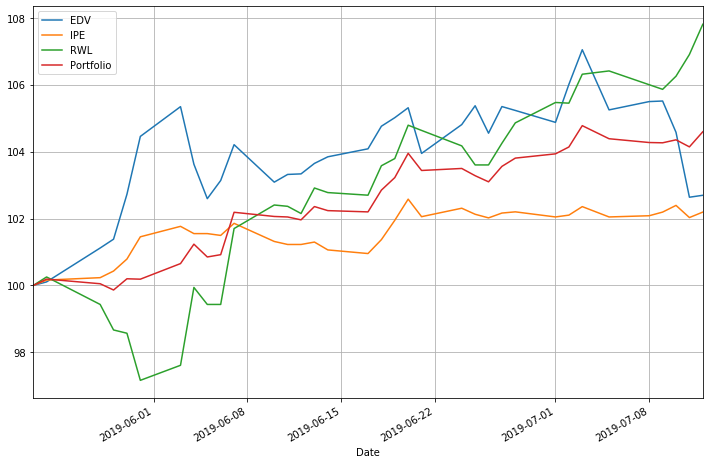

In [4]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(_lambda=2)
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(_lambda=2))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

In [ ]:
quote2 = Quote(['EDV', 'MTUM'], 50, 5)
ratio, *_ = quote2.find_optimal_ratio(_lambda=5)
print(ratio)
quote2.graph(ratio)